# CSCE 633 600 (Machine Learning) Homework 4
## Name: Rohan Chaudhury
## UIN: 432001358


### Question: Predicting one's hirability based on their job interview

Communication skills are essential for successfully entering the workforce. A particularly important communication skill is the ability to connect the job role requirements with one's professional or personal experience, which is commonly asked during job interviews.

The goal of this problem is to predict one's job hirability based on their physiological responses
and vocal measures during the interview. We have collected data from 13 participants during a
job interview with an industry representative, located inside "Homework 4" folder on CANVAS
("data.csv"). The rows of the file refer to the samples of the dataset, where each interviewee
participant corresponds to one sample. The columns denote the participant ID (column 1),
participant's physiological and vocal measures (columns 2-9), and the outcome variable (column
10), as described below:

1. PID: interviewee ID

2. SCL: skin conductance level measured as a proxy of the amount of sweat elicited from the body (measure of physiological reactivity)

3. SCRAmp: average amplitude of skin conductance responses (measure of physiological reactivity)

4. SCRfreq: average number of skin conductance responses (measure of physiological reactivity)

5. HRmean: average heart rate (measure of physiological reactivity)

6. ACCmean: average wrist acceleration

7. Energy: energy of the speech signal (measure of voice loudness)

8. ZCR: speech zero-crossing rate (proxy measure of speech rate)

9. VoiceProb: voicing probability of speech (measure of speech quality)

10. Hirability: hirability score assigned by the interviewer (1-5 scale; 1: low; 5: high)

### (1) (2 points) Feature exploration: Compute the Pearson's correlation between each feature and the hirability score (i.e., 8 correlations in total). Which features appear to be the most predictive of the outcome? Please comment on the sign (i.e., positive/negative) of the correlation values.

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree

In [35]:
file_train="data.csv"

train_rows =pd.read_csv(file_train)

print (train_rows.head())
print (" ")
print("Total no. of rows in data.csv: %d \n"%(len(train_rows)))
print (" ")
print("Total no. of colums in data.csv: %d \n"%(train_rows.shape[1]))

  PID       SCL    SCRamp   SCRfreq      HRmean    ACCmean    Energy  \
0  P1  0.827077  0.094424  2.898792   73.276206  66.491987  0.005447   
1  P2  5.183890  0.244549  5.219806  102.502828  65.031908  0.005782   
2  P3  0.023257       NaN  0.000000   90.603827  64.658708  0.006265   
3  P4  0.211715  0.008790  2.299042   80.258785  65.260810  0.006127   
4  P5  0.082192  0.011505  1.299459   71.348170  66.607203  0.005081   

        ZCR  VoiceProb  Hirability  
0  0.120261   0.403078           4  
1  0.074726   0.457309           5  
2  0.098657   0.427495           5  
3  0.091186   0.437544           3  
4  0.076909   0.374498           4  
 
Total no. of rows in data.csv: 13 

 
Total no. of colums in data.csv: 10 



In [26]:
for i in range(1,train_rows.shape[1]-1):
    correlation=train_rows.iloc[:,[i,-1]].corr(method='pearson')
    print ("Pearson's correlation coefficient between {} and {} is : {}".format(train_rows.columns[-1], train_rows.columns[i], correlation.iloc[0,1]))

Pearson's correlation coefficient between Hirability and SCL is : -0.05021625845476406
Pearson's correlation coefficient between Hirability and SCRamp is : 0.25910061151032837
Pearson's correlation coefficient between Hirability and SCRfreq is : -0.28007354950846525
Pearson's correlation coefficient between Hirability and HRmean is : 0.08944574167632677
Pearson's correlation coefficient between Hirability and ACCmean is : 0.02948404711128631
Pearson's correlation coefficient between Hirability and Energy is : 0.4768001512064216
Pearson's correlation coefficient between Hirability and ZCR is : -0.0492520278990791
Pearson's correlation coefficient between Hirability and VoiceProb is : 0.2872210071588297


### Answer: The Pearson's correlation between each feature and the hirability score is as follows:

Pearson's correlation coefficient between Hirability and SCL is : -0.05021625845476406

Pearson's correlation coefficient between Hirability and SCRamp is : 0.25910061151032837

Pearson's correlation coefficient between Hirability and SCRfreq is : -0.28007354950846525

Pearson's correlation coefficient between Hirability and HRmean is : 0.08944574167632677

Pearson's correlation coefficient between Hirability and ACCmean is : 0.02948404711128631

Pearson's correlation coefficient between Hirability and Energy is : 0.4768001512064216

Pearson's correlation coefficient between Hirability and ZCR is : -0.0492520278990791

Pearson's correlation coefficient between Hirability and VoiceProb is : 0.2872210071588297


The feature **Energy** with Pearson's correlation coefficient value of 0.47 appears to be the most predictive of the outcome value Hirability.


Features having positive Pearson's correlation coefficient with Hirability:

1. SCRamp

2. HRmean

3. ACCmean

4. Energy

5. VoiceProb

Features having negative Pearson's correlation coefficient with Hirability:

1. SCL

2. SCRfreq

3. ZCR



**A positive Pearson's correlation coefficient between two variables indicates a positive association between them; that is, as the value of one variable increases, so does the value of the other variable.**

**A negative Pearson's correlation coefficient between two variables indicates a negative association between them; that is, as the value of one variable increases, the value of the other variable decreases.**

### (2) (3 points) Decision tree modeling: Use a decision tree to estimate each interviewee's hirability score based on their physiological and vocal measures. Use a leave-one-sample-out cross-validation (i.e., equivalent to leave-one-participant-out in this case), according to which you will have as many folds as the number of samples (i.e., participants). In each fold, you will use one participant as the test and the rest for training the decision tree. Please collect the estimated hirability score on the test sample from each fold. After all folds are done, please report the average absolute error across all participants (i.e., by taking the estimated hirability value of the test participant from each fold). Experiment with various hyper-parameters (e.g., tree depth) and feature combinations.

In [110]:
# feature_set_1=["SCL","SCRamp","SCRfreq","HRmean","ACCmean","Energy","ZCR","VoiceProb"]
# X_matrix_1=train_rows.loc[:,feature_set_1]
# X_matrix_1=X_matrix_1.to_numpy()
# Y_matrix_1=train_rows.loc[:,"Hirability"]
# Y_matrix_1=Y_matrix_1.to_numpy()


def decision_tree(X_train,Y_train, tree_depth=None, plot_tree=False):
    if tree_depth:
        clf = tree.DecisionTreeClassifier(max_depth=tree_depth)
    else:    
        clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train,Y_train)
    if plot_tree:
        tree.plot_tree(clf)
    return clf



def get_score_dt(train_rows, feature_set=["SCL","SCRamp","SCRfreq","HRmean","ACCmean","Energy","ZCR","VoiceProb"], tree_depth=None, print_hirability=False, print_avg_score=True):
    X_matrix=train_rows.loc[:,feature_set]
    X_matrix=X_matrix.to_numpy()
    Y_matrix=train_rows.loc[:,"Hirability"]
    Y_matrix=Y_matrix.to_numpy()
    X_matrix = np.nan_to_num(X_matrix)
    scores=[]
    abs_err=[]
#     print (X_matrix)
    for i in range(0, len(Y_matrix)):
        if (i!=0):
            X_train=np.concatenate((X_matrix[:i],X_matrix[i+1:]))
            Y_train=np.concatenate((Y_matrix[:i],Y_matrix[i+1:]))
            X_test=X_matrix[i:i+1]
            Y_test=Y_matrix[i:i+1]
        else:
            X_train=X_matrix[1:]
            Y_train=Y_matrix[1:]
            X_test=X_matrix[:1]
            Y_test=Y_matrix[:1]
        
        
        
#         print (X_train)

        clf=decision_tree(X_train,Y_train,tree_depth)
#         trees.append(clf)
        pred=clf.predict(X_test)
        if print_hirability:
            print ("Predicted Hirability score for sample P{} with original hirability score of {} is: {}".format(i+1, Y_test, pred))
        scores.append(pred)
        abs_err.append(abs(pred-Y_test))
    
    avg_abs_err=sum(abs_err)/len(abs_err)
    if print_avg_score:
        if tree_depth:
            print ("Average absolute error across all participants with tree depth of {} and features {} is: {}".format(tree_depth,feature_set,avg_abs_err))

        else:
            print ("Average absolute error across all participants with no limit on tree depth and features {} is: {}".format(feature_set,avg_abs_err))
        print (" ")
    return avg_abs_err
        
# trees=[]
print ("Printing hirability scores for 1 case:")
print (" ")
get_score_dt(train_rows, print_hirability=True)


Printing hirability scores for 1 case:
 
Predicted Hirability score for sample P1 with original hirability score of [4] is: [3]
Predicted Hirability score for sample P2 with original hirability score of [5] is: [5]
Predicted Hirability score for sample P3 with original hirability score of [5] is: [3]
Predicted Hirability score for sample P4 with original hirability score of [3] is: [5]
Predicted Hirability score for sample P5 with original hirability score of [4] is: [4]
Predicted Hirability score for sample P6 with original hirability score of [4] is: [4]
Predicted Hirability score for sample P7 with original hirability score of [5] is: [4]
Predicted Hirability score for sample P8 with original hirability score of [4] is: [4]
Predicted Hirability score for sample P9 with original hirability score of [4] is: [5]
Predicted Hirability score for sample P10 with original hirability score of [5] is: [4]
Predicted Hirability score for sample P11 with original hirability score of [5] is: [4]


array([1.])

### Answer: The estimated hirability score on the test sample from 1 hyperparameter combination is printed above.

In [111]:
print ("Printing only Average Absolute error for the rest of the hyperparameter combinations:")
print (" ")

hyperparams=[(None,["SCRamp","SCRfreq","Energy","VoiceProb"]),(None,["Energy"]),(2,["Energy","VoiceProb"]),(2,["SCRamp","SCRfreq","Energy","VoiceProb"]),(3,["SCL","SCRamp","SCRfreq","HRmean","ACCmean","Energy","ZCR","VoiceProb"]),(4,["SCRamp","SCRfreq","Energy","VoiceProb"]),(5,["Energy"])]


avg_scores=[]
# trees=[]
for hyp in hyperparams:
#     print (hyp[1],hyp[0])
    avg_score=get_score_dt(train_rows, feature_set=hyp[1], tree_depth=hyp[0])
    avg_scores.append(avg_score)

Printing only Average Absolute error for the rest of the hyperparameter combinations:
 
Average absolute error across all participants with no limit on tree depth and features ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.92307692]
 
Average absolute error across all participants with no limit on tree depth and features ['Energy'] is: [1.]
 
Average absolute error across all participants with tree depth of 2 and features ['Energy', 'VoiceProb'] is: [0.92307692]
 
Average absolute error across all participants with tree depth of 2 and features ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.92307692]
 
Average absolute error across all participants with tree depth of 3 and features ['SCL', 'SCRamp', 'SCRfreq', 'HRmean', 'ACCmean', 'Energy', 'ZCR', 'VoiceProb'] is: [0.61538462]
 
Average absolute error across all participants with tree depth of 4 and features ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.84615385]
 
Average absolute error across all participants with tree

### Answer: After all folds are done, the average absolute error across all participants is calculated and printed above for various hyper-parameters and feature combinations.

## (3) (2 points) Decision tree visualization: Provide a plot of the root, nodes, and decisionboundaries of the best decision tree. Provide your intuition regarding the resulting model.

The best decision tree with minimum average absolute error of [0.61538462] has tree depth of 3 and following features in the training set: ['SCL', 'SCRamp', 'SCRfreq', 'HRmean', 'ACCmean', 'Energy', 'ZCR', 'VoiceProb']
 
Decision tree visualization:
 


DecisionTreeClassifier(max_depth=3)

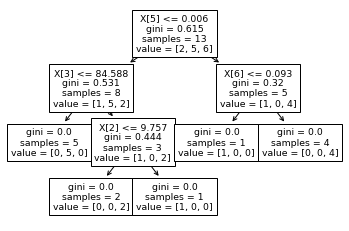

In [120]:
min_avg_error_idx=avg_scores.index(min(avg_scores))


print ("The best decision tree with minimum average absolute error of {} has tree depth of {} and following features in the training set: {}".format(min(avg_scores),hyperparams[min_avg_error_idx][0],hyperparams[min_avg_error_idx][1]))
print (" ")
print ("Decision tree visualization:")
print (" ")

X_matrix_opt=train_rows.loc[:,hyperparams[min_avg_error_idx][1]]
X_matrix_opt=X_matrix_opt.to_numpy()
Y_matrix_opt=train_rows.loc[:,"Hirability"]
Y_matrix_opt=Y_matrix_opt.to_numpy()
X_matrix_opt = np.nan_to_num(X_matrix_opt)


decision_tree(X_matrix_opt,Y_matrix_opt, tree_depth=hyperparams[min_avg_error_idx][0], plot_tree=True)
# tree.plot_tree(clf)